# <center>Data Mining Project 1 Spring semester 2018-2019</center>
## <center>Παναγιώτης Ευαγγελίου &emsp; 1115201500039</center>
## <center>Ευάγγελος Σπίθας &emsp;&emsp;&emsp;&ensp; 1115201500147</center>

___

### Do all the necessary imports for this notebook

In [1]:
# for wordclouds
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd
from wordcloud import WordCloud
from IPython.display import Image
from PIL import Image as imgWordcloud
import numpy as np

# for preprocessing
import re
from string import punctuation
from nltk.stem import StemmerI, RegexpStemmer, LancasterStemmer, ISRIStemmer, PorterStemmer, SnowballStemmer, RSLPStemmer
from nltk import word_tokenize

## __Data Analysis__

- ### *Wordclouds*

In [2]:
# read train data
trainData = pd.read_csv('../twitter_data/train2017.tsv', sep='\t', names=['ID_1', 'ID_2', 'Label', 'Text'])
# trainData = trainData[:5000] # printToBeRemoved

# make stop words
myAdditionalStopWords = [ ] #['said','say','just','it','says','It']
stopWords = ENGLISH_STOP_WORDS.union(myAdditionalStopWords)

# trainData # printToBeRemoved

  - #### Wordcloud for all tweets

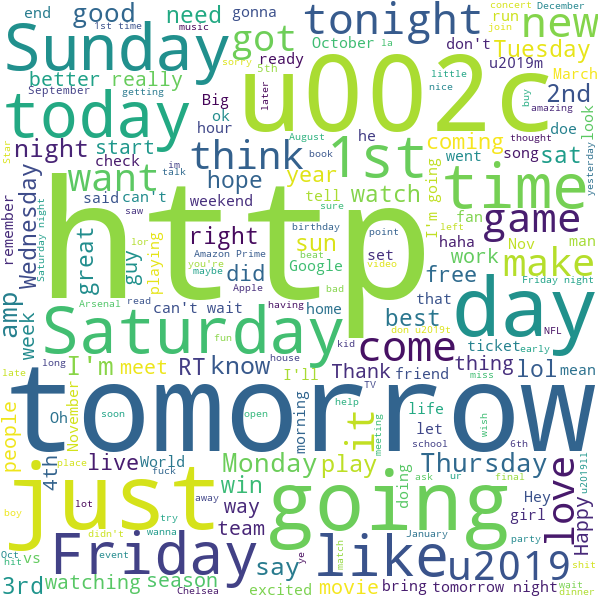

In [3]:
# make a text of all tweets
wholeText = ''
for tweetText in trainData['Text']:
    wholeText = wholeText + ' ' +  tweetText

#wholeText # printToBeRemoved

wc = WordCloud(width=600,height=600,background_color = 'white', stopwords = stopWords)

wc.generate(wholeText)
wc.to_file('wholeTextWordcloud.png')

Image('wholeTextWordcloud.png')

As we see in the above wordcloud there are many useless words like "http" so let's do some preprocessing.

In [4]:
def replaceEmojis(text):
    '''
    Turn emojis into smilePositive and smileNegative to reduce noise
    '''
    processedText = text.replace('0:-)', 'smilePositive')
    processedText = processedText.replace(':)', 'smilePositive')
    processedText = processedText.replace(':D', 'smilePositive')
    processedText = processedText.replace(':*', 'smilePositive')
    processedText = processedText.replace(':o', 'smilePositive')
    processedText = processedText.replace(':p', 'smilePositive')
    processedText = processedText.replace(';)', 'smilePositive')

    processedText = processedText.replace('>:(', 'smileNegative')
    processedText = processedText.replace(';(', 'smileNegative')
    processedText = processedText.replace('>:)', 'smileNegative')
    processedText = processedText.replace('d:<', 'smileNegative')
    processedText = processedText.replace(':(', 'smileNegative')
    processedText = processedText.replace(':|', 'smileNegative')
    processedText = processedText.replace('>:/', 'smileNegative')

    return processedText

def preprocessText(initText):

    # Decode unicode characters
    processedText = initText.encode().decode('unicode-escape')

    # Make everything to lower case
    processedText = processedText.lower()

    # Remove urls
    processedText = re.sub(r'(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)'
                           r'*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?', ' ', processedText)

    # Remove hashtags
    processedText = re.sub(r"\B#\w\w+", ' ', processedText)

    # Remove tags
    processedText = re.sub(r"\B@\w\w+", ' ', processedText)

    # Replace emojis with tags
    processedText = replaceEmojis(processedText)

    # Replace hahas
    processedText = re.sub('hahaha+', ' ', processedText)
    processedText = re.sub('haha+', ' ', processedText)

    # Remove consecutive spaces
    processedText = re.sub(r" {2,}", ' ', processedText)

    # Remove any punctuation from the text
    for c in punctuation:
        processedText = processedText.replace(c, ' ')

    # Split to words
    tokens = word_tokenize(processedText)

    # stemmer = PorterStemmer()
    # stems = [stemmer.stem(token) for token in tokens]
    # filtered = [w for w in stems if w not in stopwords.words('english')]

    filtered = [w for w in tokens if w not in stopWords]

    if not filtered:  # list is empty
        processedText = ''
    else:
        processedText = filtered[0]
        for token in filtered[1:]:
            processedText = processedText + ' ' + token

    return processedText


In [5]:
for index, row in trainData.iterrows():
    initialText = row["Text"]
    trainData.loc[index, "Text"] = preprocessText(initialText)

# trainData # printToBeRemoved

/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\m'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\_'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\/'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\ '
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\*'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\K'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\i'
/home/panos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\o'


Let's make again a wordcloud for the text of all tweets

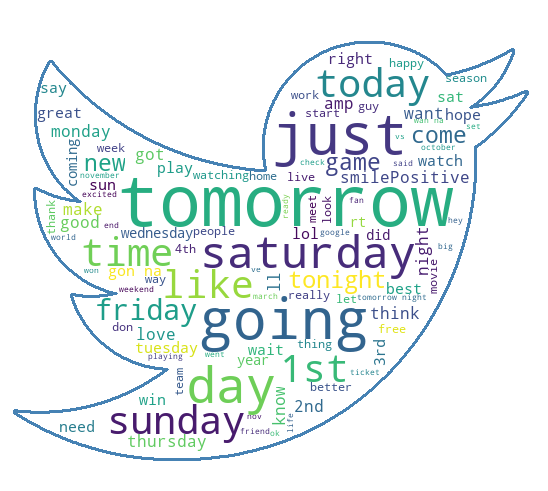

In [6]:
# make a text of all tweets
wholeText = ''
for tweetText in trainData['Text']:
    wholeText = wholeText + ' ' + tweetText

# wholeText # printToBeRemoved

generalMask = np.array(imgWordcloud.open("generalMask.png"))

wc = WordCloud(background_color="white", mask=generalMask, max_words=100,
               stopwords=stopWords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(wholeText)

# store to file
wc.to_file('wholeTextCleanWordcloud.png')

Image('wholeTextCleanWordcloud.png')

#### Make content for each category of all tweets

In [7]:
tweetCategories = list(set(trainData['Label']))

# make a dictionary of form {category:contentString}
contentDict = { category:'' for category in tweetCategories }

# fill the content of each category
for (content, category) in zip(trainData['Text'], trainData['Label']):
    contentDict[category] = contentDict[category] + ' ' + content

# contentDict # printToBeRemoved

  - #### Wordcloud for positive tweets

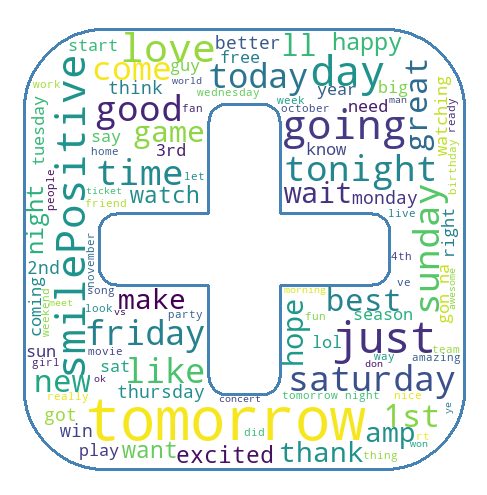

In [8]:
positiveMask = np.array(imgWordcloud.open("positiveMask.png"))

wc = WordCloud(background_color="white", mask=positiveMask, max_words=100,
               stopwords=stopWords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(contentDict['positive'])

# store to file
wc.to_file('positiveWordcloud.png')

Image('positiveWordcloud.png')

  - #### Wordcloud for negative tweets

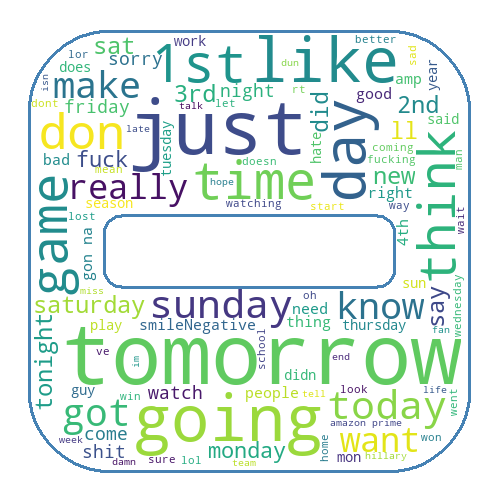

In [9]:
negativeMask = np.array(imgWordcloud.open("negativeMask.png"))

wc = WordCloud(background_color="white", mask=negativeMask, max_words=100,
               stopwords=stopWords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(contentDict['negative'])

# store to file
wc.to_file('negativeWordcloud.png')

Image('negativeWordcloud.png')

  - #### Wordcloud for neutral tweets

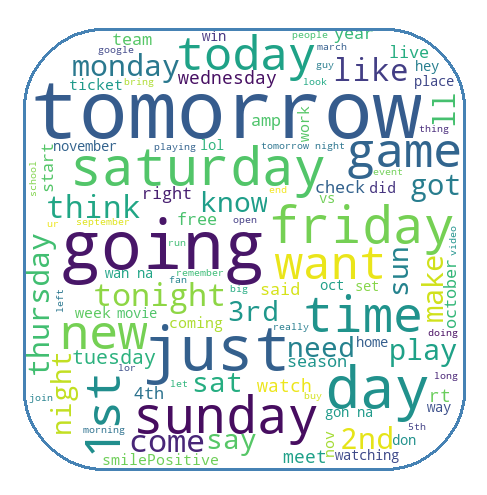

In [10]:
neutralMask = np.array(imgWordcloud.open("neutralMask.png"))

wc = WordCloud(background_color="white", mask=neutralMask, max_words=100,
               stopwords=stopWords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(contentDict['neutral'])

# store to file
wc.to_file('neutralWordcloud.png')

Image('neutralWordcloud.png')